<a href="https://colab.research.google.com/github/DanielBueno2001/Hola-Mundo/blob/main/DL1/Definitivo_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import keras

In [3]:
# Cargar y visualizar datos
data_file = '/content/jena_climate_2009_2016.csv'
data = pd.read_csv(data_file)
print(data.head())
print(data.describe())


             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03        

In [4]:
# Separar datos en entrada (inputs) y salida (outputs)
inputs1, inputs2, outputs = data.iloc[:, 1], data.iloc[:, 5:15], data.iloc[:, 2]
inputs = pd.concat([inputs1, inputs2], axis=1)
inputs = inputs.fillna(inputs.mean())

In [5]:
# Separar datos en entrada (inputs) y salida (outputs)
inputs1, inputs2, outputs = data.iloc[:, 1], data.iloc[:, 5:15], data.iloc[:, 2]
inputs = pd.concat([inputs1, inputs2], axis=1)
inputs = inputs.fillna(inputs.mean())

In [8]:
# Convertir a numpy para el modelo
X = inputs.to_numpy()
y = outputs.to_numpy()

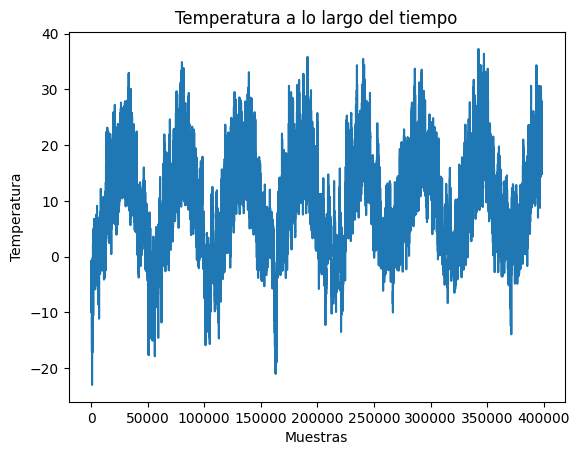

In [9]:
# Gráfico de temperatura en el tiempo
plt.plot(range(len(y)), y)
plt.title("Temperatura a lo largo del tiempo")
plt.xlabel("Muestras")
plt.ylabel("Temperatura")
plt.show()

In [10]:
# Dividir datos en entrenamiento, validación y prueba
No_train = 210275
No_val = 105138
No_test = 105138

In [11]:
# Estandarización de datos
media = X[0:No_train].mean(axis=0)
std = X[0:No_train].std(axis=0)
X = (X - media) / std

In [12]:
# Parámetros para la creación de secuencias de tiempo
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 128

In [13]:
# Crear dataset de entrenamiento, validación y prueba
train_dataset = keras.utils.timeseries_dataset_from_array(
    X[:-delay],
    targets=y[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=No_train
)

val_dataset = keras.utils.timeseries_dataset_from_array(
    X[:-delay],
    targets=y[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=No_train,
    end_index=No_train + No_val
)

test_dataset = keras.utils.timeseries_dataset_from_array(
    X[:-delay],
    targets=y[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=No_train + No_val
)

In [22]:
# Definir el modelo LSTM ajustado
units = 64           # Número de unidades LSTM
dropout_rate = 0.3   # Tasa de Dropout
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10          # Máximo de épocas

model_LSTM = Sequential([
    LSTM(units, recurrent_dropout=dropout_rate, input_shape=(sequence_length, X.shape[-1])),
    Dropout(dropout_rate),
    Dense(1)
])

In [23]:
# Compilar el modelo
optimizer = RMSprop(learning_rate=learning_rate)
model_LSTM.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [24]:
# Usar EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)


In [25]:
# Entrenar el modelo
history_LSTM = model_LSTM.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=[early_stopping]
)

Epoch 1/10
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 316s 192ms/step - loss: 24.5820 - mae: 3.6012 - val_loss: 9.3358 - val_mae: 2.3580
Epoch 2/10
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 322s 192ms/step - loss: 10.8151 - mae: 2.5760 - val_loss: 9.2208 - val_mae: 2.3366
Epoch 3/10
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 314s 192ms/step - loss: 10.1100 - mae: 2.4869 - val_loss: 9.2081 - val_mae: 2.3380
Epoch 4/10
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 323s 192ms/step - loss: 9.5851 - mae: 2.4184 - val_loss: 9.1206 - val_mae: 2.3322
Epoch 5/10
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 317s 193ms/step - loss: 9.1995 - mae: 2.3700 - val_loss: 9.1601 - val_mae: 2.3346
Epoch 6/10
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 321s 193ms/step - loss: 8.9353 - mae: 2.3355 - val_loss: 9.1894 - val_mae: 2.3280
Epoch 7/10
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 319s 194ms/step - loss: 8.6914 - mae: 2.3048 - val_loss: 9.2007 - val_mae: 2.3472
Epoch 8/10
1638/1638 ━━━━━━━━━━━━━━━━━━━━ 321s 194ms/step - loss: 8.5009 - mae: 2.2739 - val_loss: 9.2041 - val_mae: 2.3393
Epoch

In [26]:
# Evaluar el modelo en el conjunto de prueba
test_mae = model_LSTM.evaluate(test_dataset)[1]
print(f"Test MAE: {test_mae:.2f}")

637/637 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - loss: 10.3728 - mae: 2.5438
Test MAE: 2.54


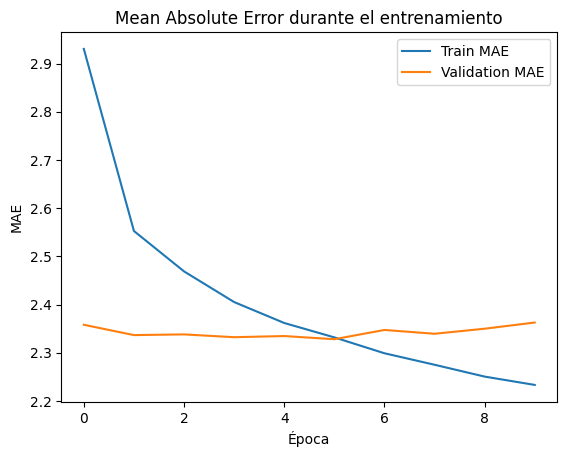

In [27]:
# Graficar la métrica MAE para entrenamiento y validación
plt.figure()
plt.plot(history_LSTM.history['mae'], label='Train MAE')
plt.plot(history_LSTM.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error durante el entrenamiento')
plt.ylabel('MAE')
plt.xlabel('Época')
plt.legend(loc='upper right')
plt.show()